#### In this project, I have made an attempt to classify book genres according to their cover pages using the FastAI framework and transfer learning.
###### Data for this has been scraped from Google Images using :

```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Go to the Google Images page from you want to download images from, and type the above code on 'console' inside the 'Inspect' available in Google Chrome.
This will get you the urls for all the images downloaded in a .csv file.

Additionally, I have used My Drive to save my data for this project. You can choose any path to do so.


In [ ]:
#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [1]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#import google drive package
from  google.colab import drive

In [3]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
from fastai.vision import *

In [5]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI_Projects/'

In [6]:
# to make folder 
(Path(root_path)/'Books').mkdir(parents=True, exist_ok=True)

In [7]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI_Projects/Books/'

In [8]:
#make folder names 
folders = ['children','horror','political','sci-fi','romance']

In [9]:
#create all folders in /Books
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [10]:
#save fastai path 
p_path = Path(proj_path)

Download the images from the csv files :

In [ ]:
for file, folder in [('children.csv', 'children'), ('horror.csv', 'horror'), 
                     ('political.csv', 'political'), ('sci-fi.csv', 'sci-fi'),
                     ('romance.csv','romance')]:
    dest = p_path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(p_path/file, dest, max_pics=500)

Verify the downloaded images:

In [ ]:
for folder in ('children', 'horror', 'political', 'sci-fi','romance'):
    print(folder)
    verify_images(p_path/folder, delete=True, max_size=600)

children


horror


political


sci-fi


romance


Now that we have our required image data in the folders, we can use `ImageDataBunch.from_folder` to get our data into training and validation sets, in which, labels are taken from the folder names themselves.
We also perform some standard transformations and normalisations, keeping our image size of 224x224.

In [51]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

**Data** **Exploration**

In [52]:
data

ImageDataBunch;

Train: LabelList (1957 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
children,children,children,children,children
Path: gdrive/My Drive/AI_Projects/Books;

Valid: LabelList (489 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
romance,political,political,romance,horror
Path: gdrive/My Drive/AI_Projects/Books;

Test: None

In [13]:
data.classes

['children', 'horror', 'political', 'romance', 'sci-fi']

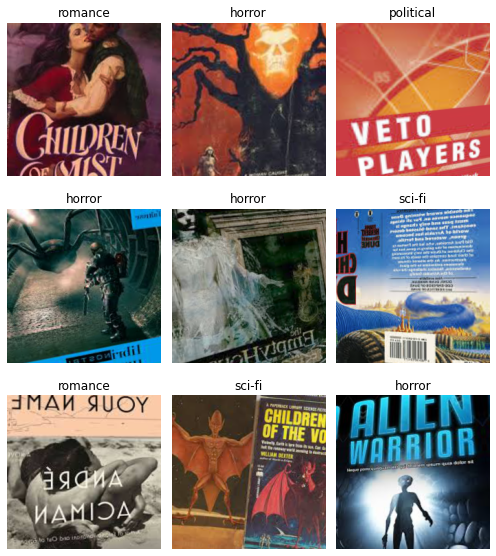

In [14]:
data.show_batch(rows=3, figsize=(7, 8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['children', 'horror', 'political', 'romance', 'sci-fi'], 5, 1957, 489)

Now that we have seen our data and explored it visually, it is time to get this data to training. 

## Training: ResNet34

In [188]:
from fastai.metrics import accuracy
learn = create_cnn(data, models.resnet34, metrics=accuracy)

We can have a look at the details of the model architecture by printing out `learn` as shown below:

In [189]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (1957 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
children,children,children,children,children
Path: gdrive/My Drive/AI_Projects/Books;

Valid: LabelList (489 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
romance,political,political,romance,horror
Path: gdrive/My Drive/AI_Projects/Books;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

As it is clear, resnet34 is a convolutional neural network that is 34 layers deep.

In [190]:
defaults.device = torch.device('cuda') # makes sure the gpu is used

In [191]:
torch.cuda.is_available()

True

In [192]:
# Switch off the warnings to avoid long warning messages
import warnings
warnings.filterwarnings('ignore')

Before starting our training process, we need to find a suitable learning rate. And to do so, we call `lr_find()` method.

In [193]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


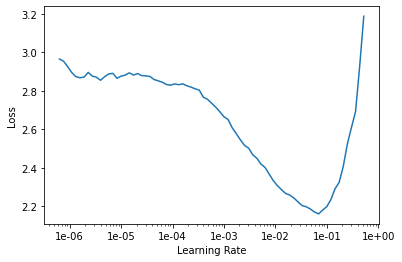

In [194]:
learn.recorder.plot()

For choosing a lr, we usually check for the point after which the graph starts going downwards drastically. Here, that point seems to be somehere between 1e-04 and 1e-03. So lets take 1e-03 (i.e., 0.001). With lr=0.001, we'll train our model.

In [195]:
lr = 0.001

In [196]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.603439,1.521597,0.417178,00:25
1,1.924863,1.133864,0.605317,00:25
2,1.565793,1.076410,0.631902,00:25
3,1.326720,1.060250,0.629857,00:25
4,1.172281,1.039013,0.652352,00:26
5,1.036305,1.032296,0.648262,00:26
6,0.930798,1.002763,0.662577,00:26
7,0.886977,0.989726,0.668712,00:26
8,0.841305,0.995063,0.660532,00:26
9,0.795311,0.990810,0.660532,00:26


It is clear that we are at an accuracy of 66% with a high train and validation loss.
Now, we'll `unfreeze` all the layers in the network and then find the best learning rate for our model.

In [197]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

In [198]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


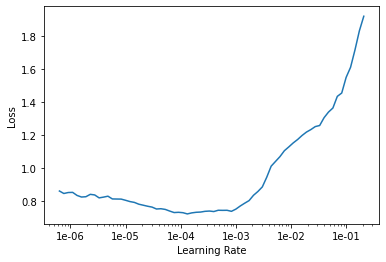

In [199]:
learn.recorder.plot()

In this case, we can see that we have a very different looking curve than what we had got above. So here, we choose a point on x-axis(which has lr) after which the curve drastically starts going up, or in other words, a point after which loss starts increasing exponentially. Looking at this graph, that point seems to be 1e-03. But I'm going to take a point lower than 1e-03, which is 1e-04, just due to a proven working strategy.

In [200]:
learn.fit_one_cycle(10, slice(0.0001, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.748685,0.975543,0.658487,00:27
1,0.704367,0.985137,0.674847,00:28
2,0.659120,1.036950,0.687117,00:27
3,0.567570,1.030152,0.683027,00:27
4,0.478735,1.035457,0.707566,00:27
5,0.393298,1.081608,0.695297,00:27
6,0.307311,1.111839,0.707566,00:28
7,0.237198,1.110614,0.705521,00:27
8,0.201623,1.086403,0.699386,00:27
9,0.159652,1.081572,0.707566,00:27


As evident, we have jumped from an accuracy of 66% in the last training loop to an accuracy of 70% here, with a significantly lower training loss and a very high validation loss this time around. This phenomenon is called **overfitting** (lower training loss than validation loss). This is a very common problem in ML and DL implementations.
To solve this problem, we have to do some data cleaning.

Before going ahead, we save our model.

In [201]:
learn.save('res34-stage1')

### Data Cleaning

Fastai gives us a very convenient and hands on way to clean our data through a built in widget application inside our notebook. 

The app allows us to clean the top losses found in our model and also update and delete images manually. This combination of computer and human intelligence proves to be a great boost for our learning model. The cleaned data is saved in the provied path in the form of a csv file called 'cleaned.csv'. This file is then converted into a pandas dataframe so that we can work on it easily.

In [134]:
from fastai.widgets import *

In [202]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [203]:
ImageCleaner(ds, idxs, p_path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [204]:
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


In [205]:
ImageCleaner(ds, idxs, p_path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [206]:
df = pd.read_csv(p_path/'cleaned.csv', header='infer')
df.head()

,name,label
0,children/00000001.jpg,children
1,children/00000000.jpg,children
2,children/00000007.jpg,children
3,children/00000003.jpg,children
4,children/00000002.jpg,children


In [207]:
df[(df['name'].apply(lambda x: len(x)<5))]

,name,label


Extracting the images from the dataframe 'df' :

In [208]:
np.random.seed(42)
db = (ImageList.from_df(df, p_path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8)).normalize(imagenet_stats)

In [209]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['children', 'horror', 'political', 'romance', 'sci-fi'], 5, 1957, 489)

In [210]:
db.classes, db.c, len(db.train_ds), len(db.valid_ds)

(['children', 'horror', 'political', 'romance', 'sci-fi'], 5, 1564, 390)

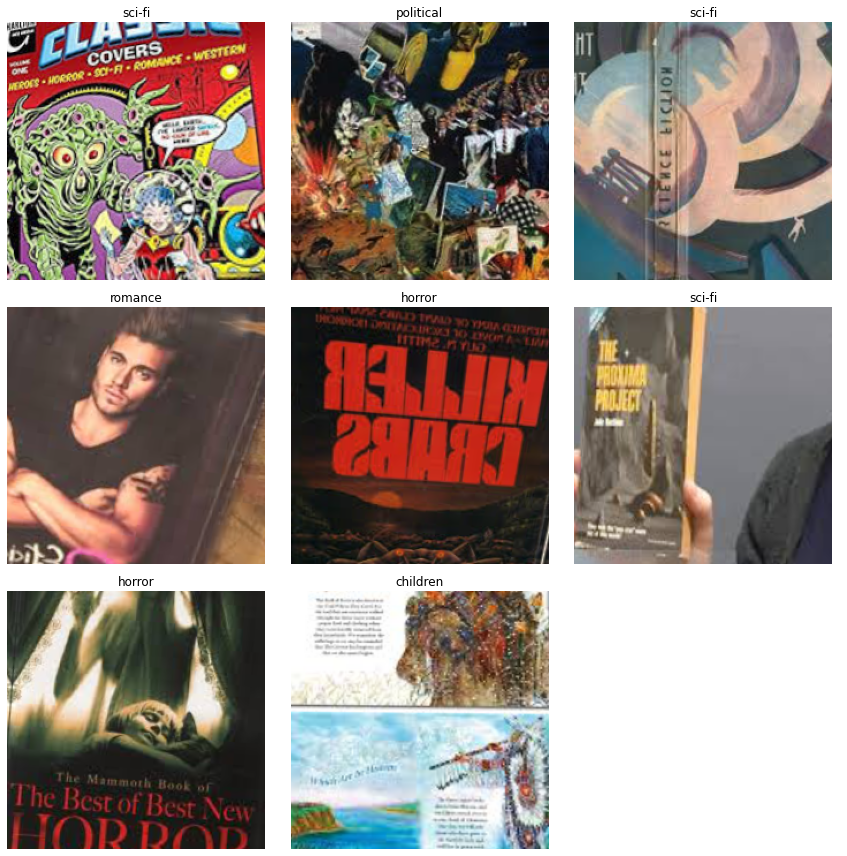

In [211]:
db.show_batch()

Now we update our model with the new and cleaned data 'db'.

In [212]:
learn.data = db

At this point, we freeze our model to avoid any further updates to the learnable parameters. After doing that, we again find a suitable lr by calling `lr_find()` and subsequently the recorder plot.

In [213]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


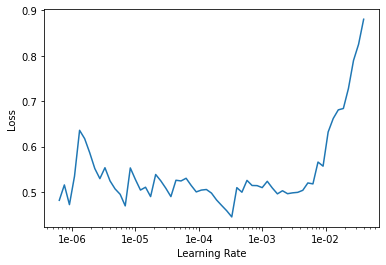

In [214]:
learn.lr_find()
learn.recorder.plot()

Going with the same basis of intuition, let's choose lr=1e-03 or lr=0.001 for the next training loop.

In [215]:
lr=0.001

In [216]:
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.447771,0.034370,0.992308,00:24
1,0.512516,0.048088,0.984615,00:24
2,0.535939,0.059676,0.989744,00:24
3,0.508637,0.070238,0.984615,00:23
4,0.449381,0.081842,0.982051,00:24
5,0.411215,0.087882,0.971795,00:24
6,0.425348,0.096330,0.974359,00:23
7,0.376467,0.068425,0.987179,00:24


We can see that we have drastically jumped from 70% accuracy to almost 99% accuracy just by performing data cleaning. Our training and validation losses are also in control and there is no problem of overfitting anymore.
So this has pretty much given us a state of the art result by now. Hence, we save our resnet34 model here for the last time.

In [217]:
learn.save('res34-stage2')

### Evaluation

The best way to evaluate a classifier model is to build a confusion matrix.

In [218]:
interp = ClassificationInterpretation.from_learner(learn)

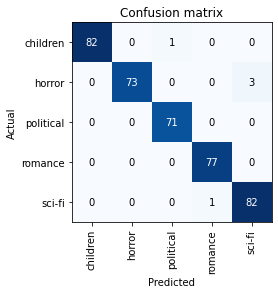

In [219]:
interp.plot_confusion_matrix()

In [220]:
interp.most_confused()

[('horror', 'sci-fi', 3),
 ('children', 'political', 1),
 ('sci-fi', 'romance', 1)]

From the above results, we can see that our model mostly mis-classified images between sci-fi and horror classes. This is understandable because many a time the cover page images of both these genres look very similar and ambiguous even to a human eye to discriminate. So we can spare our model for doing that.

Then, we can also see the top losses visually as:

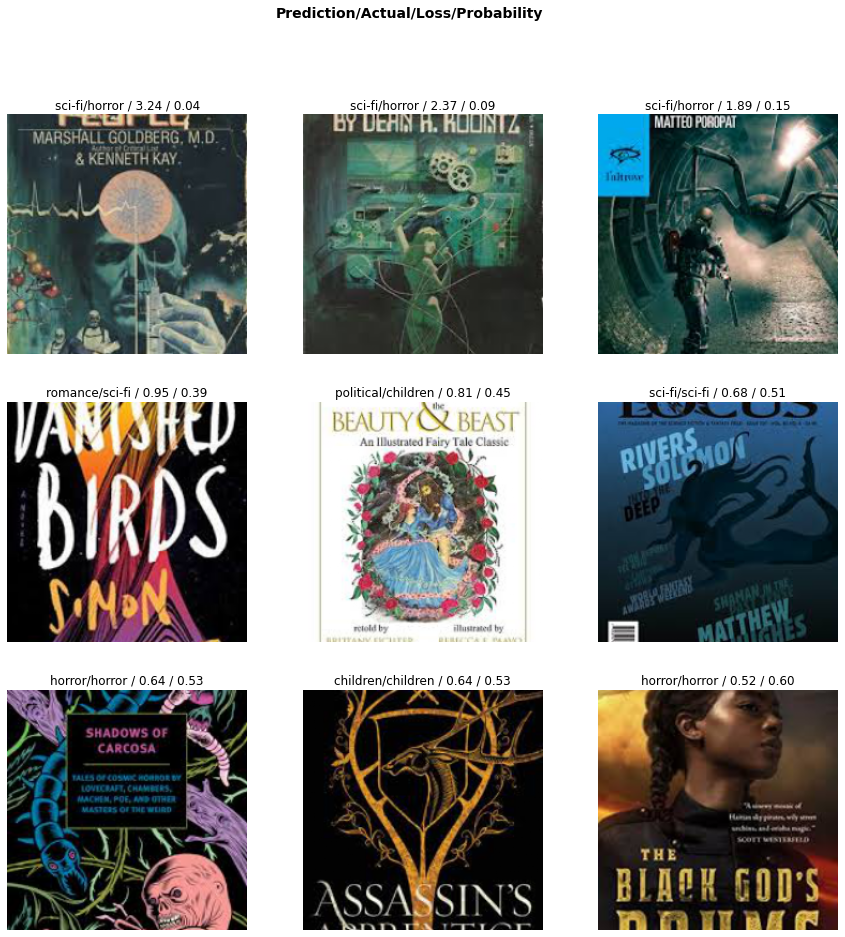

In [221]:
interp.plot_top_losses(9, figsize=(15,15))

### Predicting on test data 

It is important to check how our model is performing on unseen data, which is why below are some predictions on unseen data or test data.

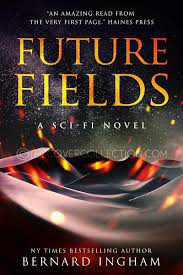

In [222]:
img = open_image('gdrive/My Drive/AI_Projects/test/f.jpeg')
img

In [223]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'sci-fi'

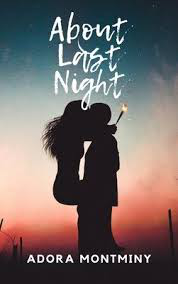

In [224]:
img1 = open_image('gdrive/My Drive/AI_Projects/test/r.jpeg')
img1

In [225]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class.obj

'romance'

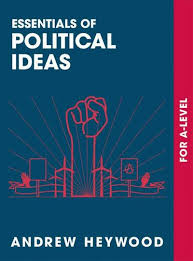

In [226]:
img2 = open_image('gdrive/My Drive/AI_Projects/test/p.jpeg')
img2

In [227]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class.obj

'political'

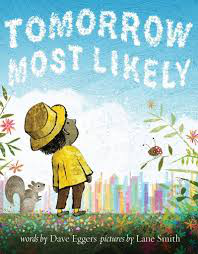

In [228]:
img3 = open_image('gdrive/My Drive/AI_Projects/test/ch.jpeg')
img3

In [229]:
pred_class,pred_idx,outputs = learn.predict(img3)
pred_class.obj

'children'

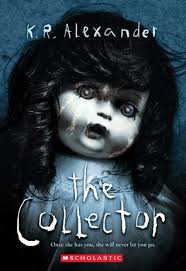

In [239]:
img4 = open_image('gdrive/My Drive/AI_Projects/test/an.jpeg')
img4

In [240]:
pred_class,pred_idx,outputs = learn.predict(img4)
pred_class.obj

'sci-fi'

This is the first image till now that our predicted wrongly. This image most probably corresponds to a horror book but our model predicted it wrongly as 'sci-fi'. Let's continue trying some more horror book covers to see if our model goes wrong again.

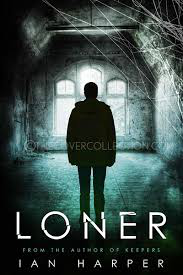

In [241]:
img5 = open_image('gdrive/My Drive/AI_Projects/test/ln.jpeg')
img5

In [242]:
pred_class,pred_idx,outputs = learn.predict(img5)
pred_class.obj

'horror'

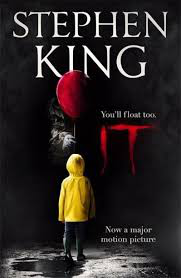

In [243]:
img6 = open_image('gdrive/My Drive/AI_Projects/test/it.jpeg')
img6

In [244]:
pred_class,pred_idx,outputs = learn.predict(img6)
pred_class.obj

'horror'

The model seems to be doing fine.
So let's export our model as export.pkl file to the current working directory, so that we can load it and use it later.

In [246]:
learn.export()